In [99]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

#I make a data frame that has the weekly mortgage rates for 30Y-FRM provided by Freddie Mac.
#The data begins during March 1971, runs to December 2021
weeklyMortgageRatesFreddy = pd.read_csv('./TryThis3.csv')
weeklyMortgageRatesFreddy = weeklyMortgageRatesFreddy[["Week", "30YrFRM"]]

#Now I import the same mortgage rates provided by Optimal Blue. 
#The data begins in January 2015, and ends to July 2022

#1 corresponds to an LTV value <= 80, 
#2 corresponds to an LTV value >80

#A : FICO <680
#B : FICO in [680,699]
#C : FICO in [700,719]
#D : FICO in [720,739]
#E : FICO >740

#So 30YR2D is 30-year fixed mortgage rates for with LTV ratios >80 whose FICO is in [720,739].

weeklyMortgageRatesOB = pd.read_csv('./OB.csv')
weeklyMortgageRatesOB.columns

Index(['Week', '30YR', '30YR1A', '30YR1B', '30YR1C', '30YR1D', '30YR1E',
       '30YR2A', '30YR2B', '30YR2C', '30YR2D', '30YR2E'],
      dtype='object')

In [100]:
#The data from Optimal Blue comes in aas percentages, so this code removes the percentages
weeklyMortgageRatesOB['30YR'] = weeklyMortgageRatesOB['30YR'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR1A'] = weeklyMortgageRatesOB['30YR1A'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR1B'] = weeklyMortgageRatesOB['30YR1B'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR1C'] = weeklyMortgageRatesOB['30YR1C'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR1D'] = weeklyMortgageRatesOB['30YR1D'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR1E'] = weeklyMortgageRatesOB['30YR1E'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR2A'] = weeklyMortgageRatesOB['30YR2A'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR2B'] = weeklyMortgageRatesOB['30YR2B'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR2C'] = weeklyMortgageRatesOB['30YR2C'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR2D'] = weeklyMortgageRatesOB['30YR2D'].str.rstrip("%").astype(float)/100
weeklyMortgageRatesOB['30YR2E'] = weeklyMortgageRatesOB['30YR2E'].str.rstrip("%").astype(float)/100

In [101]:
#This converts .023 to 2.3
weeklyMortgageRatesOB['30YR'] = 100 * weeklyMortgageRatesOB['30YR']
weeklyMortgageRatesOB['30YR1A'] = 100 * weeklyMortgageRatesOB['30YR1A']
weeklyMortgageRatesOB['30YR1B'] = 100 * weeklyMortgageRatesOB['30YR1B']
weeklyMortgageRatesOB['30YR1C'] = 100 * weeklyMortgageRatesOB['30YR1C']
weeklyMortgageRatesOB['30YR1D'] = 100 * weeklyMortgageRatesOB['30YR1D']
weeklyMortgageRatesOB['30YR1E'] = 100 * weeklyMortgageRatesOB['30YR1E']
weeklyMortgageRatesOB['30YR2A'] = 100 * weeklyMortgageRatesOB['30YR2A']
weeklyMortgageRatesOB['30YR2B'] = 100 * weeklyMortgageRatesOB['30YR2B']
weeklyMortgageRatesOB['30YR2C'] = 100 * weeklyMortgageRatesOB['30YR2C']
weeklyMortgageRatesOB['30YR2D'] = 100 * weeklyMortgageRatesOB['30YR2D']
weeklyMortgageRatesOB['30YR2E'] = 100 * weeklyMortgageRatesOB['30YR2E']

In [102]:
print(weeklyMortgageRatesOB.head())
print(weeklyMortgageRatesFreddy.head())

     Week   30YR  30YR1A  30YR1B  30YR1C  30YR1D  30YR1E  30YR2A  30YR2B  \
0  1/2/15  4.171   4.542   4.242   4.122   4.057   3.994   4.535   4.372   
1  1/5/15  4.122   4.484   4.265   4.154   4.038   3.967   4.534   4.300   
2  1/6/15  4.022   4.387   4.120   4.029   3.914   3.870   4.441   4.264   
3  1/7/15  4.035   4.392   4.155   4.054   3.974   3.872   4.475   4.266   
4  1/8/15  4.062   4.433   4.160   4.054   3.958   3.894   4.487   4.349   

   30YR2C  30YR2D  30YR2E  
0   4.298   4.190   4.139  
1   4.289   4.157   4.090  
2   4.190   4.112   4.032  
3   4.218   4.074   4.026  
4   4.285   4.145   4.042  
        Week  30YrFRM
0   4/2/1971     7.33
1   4/9/1971     7.31
2  4/16/1971     7.31
3  4/23/1971     7.31
4  4/30/1971     7.29


In [103]:
#Now we upload the prepayment rates
MonthlyCPR = pd.read_csv('./MonthlyCPRNumericDates.csv')
MonthlyCPR.columns

Index(['Date', 'FN30CPR', 'FN30WAC', 'FN30WALA', 'FN30WAM'], dtype='object')

In [104]:
MonthlyCPR.head(10)

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM
0,6/1/22,9.3,3.53,34,320
1,5/1/22,9.9,3.51,34,320
2,4/1/22,11.4,3.49,34,320
3,3/1/22,14.2,3.49,34,320
4,2/1/22,13.2,3.49,34,320
5,1/1/22,14.8,3.50,34,320
6,12/1/21,18.7,3.51,34,320
7,11/1/21,20.2,3.53,34,320
8,10/1/21,22.2,3.55,34,320
9,9/1/21,24.1,3.57,35,319


In [71]:
MonthlyCPR['Date'] = pd.to_datetime(MonthlyCPR['Date'])

In [77]:
weeklyMortgageRatesOB.head()

,Week,30YR,30YR1A,30YR1B,30YR1C,30YR1D,30YR1E,30YR2A,30YR2B,30YR2C,30YR2D,30YR2E
0,1/2/15,4.171,4.542,4.242,4.122,4.057,3.994,4.535,4.372,4.298,4.190,4.139
1,1/5/15,4.122,4.484,4.265,4.154,4.038,3.967,4.534,4.300,4.289,4.157,4.090
2,1/6/15,4.022,4.387,4.120,4.029,3.914,3.870,4.441,4.264,4.190,4.112,4.032
3,1/7/15,4.035,4.392,4.155,4.054,3.974,3.872,4.475,4.266,4.218,4.074,4.026
4,1/8/15,4.062,4.433,4.160,4.054,3.958,3.894,4.487,4.349,4.285,4.145,4.042


In [79]:
weeklyMortgageRatesOB.at[4, "Week"]

'1/8/15'

In [80]:
weeklyMortgageRatesOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Week    1885 non-null   object 
 1   30YR    1885 non-null   float64
 2   30YR1A  1885 non-null   float64
 3   30YR1B  1885 non-null   float64
 4   30YR1C  1885 non-null   float64
 5   30YR1D  1885 non-null   float64
 6   30YR1E  1885 non-null   float64
 7   30YR2A  1885 non-null   float64
 8   30YR2B  1885 non-null   float64
 9   30YR2C  1885 non-null   float64
 10  30YR2D  1885 non-null   float64
 11  30YR2E  1885 non-null   float64
dtypes: float64(11), object(1)
memory usage: 176.8+ KB


In [81]:
weeklyMortgageRatesOB['Week'] = pd.to_datetime(weeklyMortgageRatesOB['Week'])

In [82]:
weeklyMortgageRatesOB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Week    1885 non-null   datetime64[ns]
 1   30YR    1885 non-null   float64       
 2   30YR1A  1885 non-null   float64       
 3   30YR1B  1885 non-null   float64       
 4   30YR1C  1885 non-null   float64       
 5   30YR1D  1885 non-null   float64       
 6   30YR1E  1885 non-null   float64       
 7   30YR2A  1885 non-null   float64       
 8   30YR2B  1885 non-null   float64       
 9   30YR2C  1885 non-null   float64       
 10  30YR2D  1885 non-null   float64       
 11  30YR2E  1885 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 176.8 KB


In [105]:
weeklyMortgageRatesFreddy['Week'] = pd.to_datetime(weeklyMortgageRatesFreddy['Week'])

In [106]:
weeklyMortgageRatesFreddy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Week     2649 non-null   datetime64[ns]
 1   30YrFRM  2649 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.5 KB


In [87]:
MonthlyCPR.shape

(342, 5)

In [88]:
MonthlyCPR["AVGFreddy"] = pd.NaT

In [89]:
MonthlyCPR.shape

(342, 6)

In [90]:
MonthlyCPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       342 non-null    datetime64[ns]
 1   FN30CPR    342 non-null    float64       
 2   FN30WAC    342 non-null    float64       
 3   FN30WALA   342 non-null    int64         
 4   FN30WAM    342 non-null    int64         
 5   AVGFreddy  0 non-null      datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 16.2 KB


In [119]:
MonthlyCPR["Month"] = pd.to_datetime(MonthlyCPR['Date']).dt.month

In [120]:
MonthlyCPR['Year'] = pd.to_datetime(MonthlyCPR['Date']).dt.year

In [143]:
weeklyMortgageRatesOB["Month"] = pd.to_datetime(weeklyMortgageRatesOB['Week']).dt.month

In [144]:
weeklyMortgageRatesOB["Year"] = pd.to_datetime(weeklyMortgageRatesOB['Week']).dt.year

In [98]:
weeklyMortgageRatesFreddy.head()

,Week,30YrFRM,Month,Year
0,2071-04-02,7.33,4,2071
1,2071-04-09,7.31,4,2071
2,2071-04-16,7.31,4,2071
3,2071-04-23,7.31,4,2071
4,2071-04-30,7.29,4,2071


In [107]:
weeklyMortgageRatesFreddy["Month"] = pd.to_datetime(weeklyMortgageRatesFreddy['Week']).dt.month
weeklyMortgageRatesFreddy["Year"] = pd.to_datetime(weeklyMortgageRatesFreddy['Week']).dt.year

In [108]:
weeklyMortgageRatesFreddy.head()

,Week,30YrFRM,Month,Year
0,1971-04-02,7.33,4,1971
1,1971-04-09,7.31,4,1971
2,1971-04-16,7.31,4,1971
3,1971-04-23,7.31,4,1971
4,1971-04-30,7.29,4,1971


In [117]:
weeklyMortgageRatesFreddy.groupby(['Year', 'Month']).mean()

30YrFRM
Year Month         
1971 4       7.3100
     5       7.4250
     6       7.5300
     7       7.6040
     8       7.6975
...             ...
2021 8       2.8425
     9       2.9000
     10      3.0675
     11      3.0675
     12      3.0980

[609 rows x 1 columns]

In [121]:
MonthlyCPR

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year
0,6/1/22,9.3,3.53,34,320,6,2022
1,5/1/22,9.9,3.51,34,320,5,2022
2,4/1/22,11.4,3.49,34,320,4,2022
3,3/1/22,14.2,3.49,34,320,3,2022
4,2/1/22,13.2,3.49,34,320,2,2022
...,...,...,...,...,...,...,...
337,5/1/94,13.1,8.23,30,326,5,1994
338,4/1/94,16.7,8.26,30,326,4,1994
339,3/1/94,25.0,8.30,30,326,3,1994
340,2/1/94,22.3,8.35,30,326,2,1994


In [122]:
MonthlyCPR = MonthlyCPR.iloc[::-1]

In [123]:
MonthlyCPR

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year
341,1/1/94,26.8,8.41,31,326,1,1994
340,2/1/94,22.3,8.35,30,326,2,1994
339,3/1/94,25.0,8.30,30,326,3,1994
338,4/1/94,16.7,8.26,30,326,4,1994
337,5/1/94,13.1,8.23,30,326,5,1994
...,...,...,...,...,...,...,...
4,2/1/22,13.2,3.49,34,320,2,2022
3,3/1/22,14.2,3.49,34,320,3,2022
2,4/1/22,11.4,3.49,34,320,4,2022
1,5/1/22,9.9,3.51,34,320,5,2022


In [124]:
MonthlyCPR94to21 = MonthlyCPR.loc[MonthlyCPR["Year"] <2022 ]

In [125]:
MonthlyCPR94to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year
341,1/1/94,26.8,8.41,31,326,1,1994
340,2/1/94,22.3,8.35,30,326,2,1994
339,3/1/94,25.0,8.30,30,326,3,1994
338,4/1/94,16.7,8.26,30,326,4,1994
337,5/1/94,13.1,8.23,30,326,5,1994
...,...,...,...,...,...,...,...
10,8/1/21,24.6,3.60,35,319,8,2021
9,9/1/21,24.1,3.57,35,319,9,2021
8,10/1/21,22.2,3.55,34,320,10,2021
7,11/1/21,20.2,3.53,34,320,11,2021


In [126]:
weeklyMortgageRatesFreddy94to21 = weeklyMortgageRatesFreddy.loc[weeklyMortgageRatesFreddy["Year"] >= 1994 ]

In [128]:
weeklyMortgageRatesFreddy94to21.groupby(['Year', 'Month']).mean()

30YrFRM
Year Month         
1994 1       7.0600
     2       7.1525
     3       7.6750
     4       8.3160
     5       8.5975
...             ...
2021 8       2.8425
     9       2.9000
     10      3.0675
     11      3.0675
     12      3.0980

[336 rows x 1 columns]

In [133]:
MonthlyCPR94to21["Fred30YrAvG"] = weeklyMortgageRatesFreddy94to21.groupby(['Year', 'Month']).mean()['30YrFRM']

TypeError: incompatible index of inserted column with frame index

In [136]:
weeklyMortgageRatesFreddy94to21.groupby(['Year', 'Month']).mean()['30YrFRM']

Year  Month
1994  1        7.0600
      2        7.1525
      3        7.6750
      4        8.3160
      5        8.5975
                ...  
2021  8        2.8425
      9        2.9000
      10       3.0675
      11       3.0675
      12       3.0980
Name: 30YrFRM, Length: 336, dtype: float64

In [137]:
FredFRM_list = weeklyMortgageRatesFreddy94to21.groupby(['Year', 'Month']).mean()['30YrFRM'].tolist()

In [138]:
FredFRM_list

[7.0600000000000005,
 7.1525,
 7.675,
 8.315999999999999,
 8.5975,
 8.3975,
 8.614,
 8.5125,
 8.64,
 8.925,
 9.17,
 9.198,
 9.1475,
 8.8275,
 8.462,
 8.32,
 7.955,
 7.566,
 7.6075,
 7.86,
 7.636,
 7.475,
 7.3774999999999995,
 7.2,
 7.029999999999999,
 7.075,
 7.624,
 7.925000000000001,
 8.07,
 8.32,
 8.245000000000001,
 8.001999999999999,
 8.23,
 7.915,
 7.618,
 7.5975,
 7.824,
 7.65,
 7.8975,
 8.1425,
 7.944,
 7.6899999999999995,
 7.4975,
 7.4799999999999995,
 7.43,
 7.294,
 7.205,
 7.095000000000001,
 6.994,
 7.0425,
 7.1275,
 7.140000000000001,
 7.144,
 6.9975000000000005,
 6.952,
 6.9225,
 6.7225,
 6.709999999999999,
 6.865,
 6.7379999999999995,
 6.785,
 6.8075,
 7.04,
 6.9159999999999995,
 7.145,
 7.55,
 7.632,
 7.9425,
 7.8225,
 7.851999999999999,
 7.7375,
 7.912000000000001,
 8.21,
 8.325,
 8.24,
 8.1525,
 8.515,
 8.288,
 8.1475,
 8.0275,
 7.912000000000001,
 7.795,
 7.745,
 7.382,
 7.0325,
 7.05,
 6.952,
 7.0775,
 7.145,
 7.159999999999999,
 7.1275,
 6.95,
 6.8175,
 6.6175,
 6.

In [139]:
MonthlyCPR94to21["Fred30YrAvG"] = FredFRM_list

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_15194/2945283476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR94to21["Fred30YrAvG"] = FredFRM_list


In [140]:
MonthlyCPR94to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG
341,1/1/94,26.8,8.41,31,326,1,1994,7.0600
340,2/1/94,22.3,8.35,30,326,2,1994,7.1525
339,3/1/94,25.0,8.30,30,326,3,1994,7.6750
338,4/1/94,16.7,8.26,30,326,4,1994,8.3160
337,5/1/94,13.1,8.23,30,326,5,1994,8.5975
...,...,...,...,...,...,...,...,...
10,8/1/21,24.6,3.60,35,319,8,2021,2.8425
9,9/1/21,24.1,3.57,35,319,9,2021,2.9000
8,10/1/21,22.2,3.55,34,320,10,2021,3.0675
7,11/1/21,20.2,3.53,34,320,11,2021,3.0675


In [145]:
weeklyMortgageRatesOB

,Week,30YR,30YR1A,30YR1B,30YR1C,30YR1D,30YR1E,30YR2A,30YR2B,30YR2C,30YR2D,30YR2E,Month,Year
0,1/2/15,4.171,4.542,4.242,4.122,4.057,3.994,4.535,4.372,4.298,4.190,4.139,1,2015
1,1/5/15,4.122,4.484,4.265,4.154,4.038,3.967,4.534,4.300,4.289,4.157,4.090,1,2015
2,1/6/15,4.022,4.387,4.120,4.029,3.914,3.870,4.441,4.264,4.190,4.112,4.032,1,2015
3,1/7/15,4.035,4.392,4.155,4.054,3.974,3.872,4.475,4.266,4.218,4.074,4.026,1,2015
4,1/8/15,4.062,4.433,4.160,4.054,3.958,3.894,4.487,4.349,4.285,4.145,4.042,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,7/7/22,5.780,6.052,5.925,5.817,5.709,5.633,6.400,6.132,5.907,5.752,5.700,7,2022
1881,7/8/22,5.829,6.142,5.945,5.875,5.786,5.680,6.287,5.986,6.045,5.856,5.738,7,2022
1882,7/11/22,5.808,6.079,5.963,5.887,5.735,5.671,6.371,6.090,5.926,5.817,5.744,7,2022
1883,7/12/22,5.778,6.193,5.898,5.842,5.716,5.643,6.364,6.006,5.893,5.807,5.706,7,2022


In [146]:
weeklyMortgageRatesOB15to21 = weeklyMortgageRatesOB.loc[weeklyMortgageRatesOB["Year"] <2022 ]

In [147]:
weeklyMortgageRatesOB15to21

,Week,30YR,30YR1A,30YR1B,30YR1C,30YR1D,30YR1E,30YR2A,30YR2B,30YR2C,30YR2D,30YR2E,Month,Year
0,1/2/15,4.171,4.542,4.242,4.122,4.057,3.994,4.535,4.372,4.298,4.190,4.139,1,2015
1,1/5/15,4.122,4.484,4.265,4.154,4.038,3.967,4.534,4.300,4.289,4.157,4.090,1,2015
2,1/6/15,4.022,4.387,4.120,4.029,3.914,3.870,4.441,4.264,4.190,4.112,4.032,1,2015
3,1/7/15,4.035,4.392,4.155,4.054,3.974,3.872,4.475,4.266,4.218,4.074,4.026,1,2015
4,1/8/15,4.062,4.433,4.160,4.054,3.958,3.894,4.487,4.349,4.285,4.145,4.042,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,12/23/21,3.345,3.581,3.434,3.292,3.293,3.191,3.855,3.540,3.515,3.373,3.307,12,2021
1748,12/27/21,3.344,3.594,3.460,3.295,3.269,3.191,3.845,3.573,3.436,3.379,3.294,12,2021
1749,12/28/21,3.328,3.576,3.389,3.329,3.304,3.194,3.850,3.530,3.393,3.368,3.268,12,2021
1750,12/29/21,3.365,3.635,3.390,3.358,3.295,3.222,3.904,3.551,3.514,3.383,3.305,12,2021


In [148]:
MonthlyCPR15to21 = MonthlyCPR94to21.loc[MonthlyCPR94to21["Year"] >=2015 ]

In [149]:
MonthlyCPR15to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG
89,1/1/15,11.6,4.54,41,312,1,2015,3.6700
88,2/1/15,15.6,4.54,41,312,2,2015,3.7100
87,3/1/15,19.2,4.52,42,312,3,2015,3.7700
86,4/1/15,16.6,4.51,42,312,4,2015,3.6720
85,5/1/15,15.9,4.50,42,312,5,2015,3.8400
...,...,...,...,...,...,...,...,...
10,8/1/21,24.6,3.60,35,319,8,2021,2.8425
9,9/1/21,24.1,3.57,35,319,9,2021,2.9000
8,10/1/21,22.2,3.55,34,320,10,2021,3.0675
7,11/1/21,20.2,3.53,34,320,11,2021,3.0675


In [151]:
OBFRM_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR'].tolist()

In [153]:
len(OBFRM_list)

84

In [154]:
weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR']

Year  Month
2015  1        3.987400
      2        4.054789
      3        4.094591
      4        4.002773
      5        4.163100
                 ...   
2021  8        3.048500
      9        3.099762
      10       3.251100
      11       3.262737
      12       3.323333
Name: 30YR, Length: 84, dtype: float64

In [155]:
OBFRM_list

[3.9874,
 4.0547894736842105,
 4.094590909090909,
 4.002772727272728,
 4.1631,
 4.335,
 4.343045454545455,
 4.24547619047619,
 4.207285714285715,
 4.100095238095238,
 4.249,
 4.287142857142857,
 4.1786315789473685,
 3.96975,
 4.029913043478261,
 3.940285714285715,
 3.9318095238095236,
 3.8575909090909093,
 3.71385,
 3.723086956521739,
 3.7346190476190473,
 3.7907,
 4.097315789473685,
 4.437666666666667,
 4.4024,
 4.3898947368421055,
 4.458869565217391,
 4.3086,
 4.279227272727272,
 4.208772727272727,
 4.272,
 4.18295652173913,
 4.14265,
 4.216666666666667,
 4.21085,
 4.2549,
 4.37,
 4.659421052631579,
 4.720590909090909,
 4.761428571428572,
 4.869090909090909,
 4.862952380952381,
 4.854619047619048,
 4.863565217391304,
 4.953052631578948,
 5.120318181818182,
 5.16235,
 4.94905,
 4.771619047619048,
 4.693894736842105,
 4.547666666666667,
 4.447272727272727,
 4.362363636363636,
 4.0902,
 4.065954545454546,
 3.8422727272727273,
 3.8917499999999996,
 3.942,
 3.957421052631579,
 3.963380952

In [157]:
MonthlyCPR15to21["OB30YrAvG"] = OBFRM_list

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_15194/3220940795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21["OB30YrAvG"] = OBFRM_list


In [158]:
MonthlyCPR15to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,OB30YrAvG
89,1/1/15,11.6,4.54,41,312,1,2015,3.6700,3.987400
88,2/1/15,15.6,4.54,41,312,2,2015,3.7100,4.054789
87,3/1/15,19.2,4.52,42,312,3,2015,3.7700,4.094591
86,4/1/15,16.6,4.51,42,312,4,2015,3.6720,4.002773
85,5/1/15,15.9,4.50,42,312,5,2015,3.8400,4.163100
...,...,...,...,...,...,...,...,...,...
10,8/1/21,24.6,3.60,35,319,8,2021,2.8425,3.048500
9,9/1/21,24.1,3.57,35,319,9,2021,2.9000,3.099762
8,10/1/21,22.2,3.55,34,320,10,2021,3.0675,3.251100
7,11/1/21,20.2,3.53,34,320,11,2021,3.0675,3.262737


In [159]:
OBFRM1A_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1A'].tolist()
OBFRM1B_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1B'].tolist()
OBFRM1C_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1C'].tolist()
OBFRM1D_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1D'].tolist()
OBFRM1E_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR1E'].tolist()

In [160]:
OBFRM2A_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2A'].tolist()
OBFRM2B_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2B'].tolist()
OBFRM2C_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2C'].tolist()
OBFRM2D_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2D'].tolist()
OBFRM2E_list = weeklyMortgageRatesOB15to21.groupby(['Year', 'Month']).mean()['30YR2E'].tolist()

In [161]:
MonthlyCPR15to21["OB30Yr1AAvG"] = OBFRM1A_list
MonthlyCPR15to21["OB30Yr1BAvG"] = OBFRM1B_list
MonthlyCPR15to21["OB30Yr1CAvG"] = OBFRM1C_list
MonthlyCPR15to21["OB30Yr1DAvG"] = OBFRM1D_list
MonthlyCPR15to21["OB30Yr1EAvG"] = OBFRM1E_list
MonthlyCPR15to21["OB30Yr2AAvG"] = OBFRM2A_list
MonthlyCPR15to21["OB30Yr2BAvG"] = OBFRM2B_list
MonthlyCPR15to21["OB30Yr2CAvG"] = OBFRM2C_list
MonthlyCPR15to21["OB30Yr2DAvG"] = OBFRM2D_list
MonthlyCPR15to21["OB30Yr2EAvG"] = OBFRM2E_list

/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_15194/2642951932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21["OB30Yr1AAvG"] = OBFRM1A_list
/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_15194/2642951932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MonthlyCPR15to21["OB30Yr1BAvG"] = OBFRM1B_list
/var/folders/1y/m_6c5_791nd3z_2ss9r2350c0000gn/T/ipykernel_15194/2642951932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [162]:
MonthlyCPR15to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,OB30YrAvG,OB30Yr1AAvG,OB30Yr1BAvG,OB30Yr1CAvG,OB30Yr1DAvG,OB30Yr1EAvG,OB30Yr2AAvG,OB30Yr2BAvG,OB30Yr2CAvG,OB30Yr2DAvG,OB30Yr2EAvG
89,1/1/15,11.6,4.54,41,312,1,2015,3.6700,3.987400,4.365050,4.098500,3.999600,3.902550,3.838500,4.438750,4.224350,4.149000,4.053150,3.977550
88,2/1/15,15.6,4.54,41,312,2,2015,3.7100,4.054789,4.420316,4.174684,4.057474,3.971895,3.901421,4.477789,4.257263,4.179053,4.103684,4.021474
87,3/1/15,19.2,4.52,42,312,3,2015,3.7700,4.094591,4.425045,4.208636,4.098455,4.015000,3.949455,4.447591,4.273455,4.228364,4.141864,4.059636
86,4/1/15,16.6,4.51,42,312,4,2015,3.6720,4.002773,4.335000,4.127727,4.021091,3.919864,3.849591,4.378818,4.192000,4.132091,4.057000,3.968136
85,5/1/15,15.9,4.50,42,312,5,2015,3.8400,4.163100,4.471150,4.263150,4.163850,4.083900,4.019650,4.539050,4.338950,4.288750,4.206650,4.127550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,8/1/21,24.6,3.60,35,319,8,2021,2.8425,3.048500,3.308818,3.139727,3.070818,2.994591,2.929500,3.489227,3.235091,3.171136,3.087091,3.009318
9,9/1/21,24.1,3.57,35,319,9,2021,2.9000,3.099762,3.349619,3.177952,3.113952,3.043429,2.983905,3.525476,3.264333,3.211095,3.126810,3.059476
8,10/1/21,22.2,3.55,34,320,10,2021,3.0675,3.251100,3.481350,3.316650,3.268400,3.188200,3.144350,3.617950,3.409400,3.363800,3.274800,3.206300
7,11/1/21,20.2,3.53,34,320,11,2021,3.0675,3.262737,3.506842,3.330789,3.263632,3.197579,3.142263,3.676474,3.422421,3.387000,3.287053,3.217158


In [182]:
MonthlyCPR94to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG
341,1/1/94,26.8,8.41,31,326,1,1994,7.0600
340,2/1/94,22.3,8.35,30,326,2,1994,7.1525
339,3/1/94,25.0,8.30,30,326,3,1994,7.6750
338,4/1/94,16.7,8.26,30,326,4,1994,8.3160
337,5/1/94,13.1,8.23,30,326,5,1994,8.5975
...,...,...,...,...,...,...,...,...
10,8/1/21,24.6,3.60,35,319,8,2021,2.8425
9,9/1/21,24.1,3.57,35,319,9,2021,2.9000
8,10/1/21,22.2,3.55,34,320,10,2021,3.0675
7,11/1/21,20.2,3.53,34,320,11,2021,3.0675


In [163]:
import statsmodels.api as sm

<AxesSubplot:xlabel='Fred30YrAvG', ylabel='FN30CPR'>

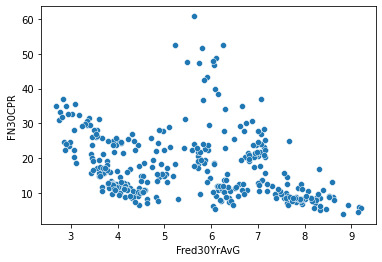

In [184]:
sns.scatterplot(data=MonthlyCPR94to21, x="Fred30YrAvG", y="FN30CPR")

In [183]:
lmFred94to21 = sm.OLS.from_formula('FN30CPR ~ Fred30YrAvG', MonthlyCPR94to21)
resultFred94to21 = lmFred94to21.fit()
resultFred94to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     33.06
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           2.01e-08
Time:                        11:13:46   Log-Likelihood:                -1224.8
No. Observations:                 336   AIC:                             2454.
Df Residuals:                     334   BIC:                             2461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.5075      1.771     15.534      0.000      24.024      30.991
Fred30YrAvG    -1.7511      0.305     -5.750      0.000      -2.350      -1.152
==============================================================================
Omnibus:                      110.611   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.436
Skew:                           1.576   Prob(JB):                     3.84e-63
Kurtosis:                       6.255   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Fred30YrAvG', ylabel='FN30CPR'>

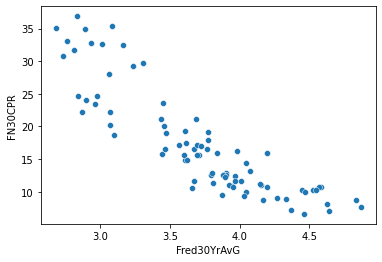

In [186]:
sns.scatterplot(data=MonthlyCPR15to21, x="Fred30YrAvG", y="FN30CPR")

In [169]:
lmFred15to21 = sm.OLS.from_formula('FN30CPR ~ Fred30YrAvG', MonthlyCPR15to21)
resultFred15to21 = lmFred15to21.fit()
resultFred15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     268.4
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.38e-27
Time:                        10:54:32   Log-Likelihood:                -232.57
No. Observations:                  84   AIC:                             469.1
Df Residuals:                      82   BIC:                             474.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      64.8316      2.944     22.022      0.000      58.975      70.688
Fred30YrAvG   -12.8335      0.783    -16.382      0.000     -14.392     -11.275
==============================================================================
Omnibus:                        4.317   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                4.226
Skew:                           0.504   Prob(JB):                        0.121
Kurtosis:                       2.562   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30YrAvG', ylabel='FN30CPR'>

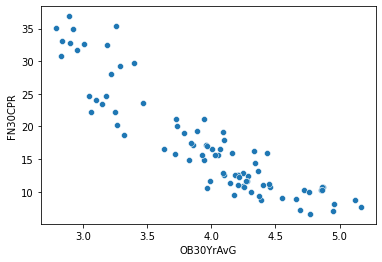

In [185]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30YrAvG", y="FN30CPR")

In [170]:
lmOB15to21 = sm.OLS.from_formula('FN30CPR ~ OB30YrAvG', MonthlyCPR15to21)
resultOB15to21 = lmOB15to21.fit()
resultOB15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     374.7
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           2.56e-32
Time:                        10:55:04   Log-Likelihood:                -221.45
No. Observations:                  84   AIC:                             446.9
Df Residuals:                      82   BIC:                             451.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.9866      2.450     26.113      0.000      59.112      68.861
OB30YrAvG    -11.8138      0.610    -19.356      0.000     -13.028     -10.600
==============================================================================
Omnibus:                        2.275   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.276
Skew:                           0.363   Prob(JB):                        0.320
Kurtosis:                       2.649   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
MonthlyCPR15to21

,Date,FN30CPR,FN30WAC,FN30WALA,FN30WAM,Month,Year,Fred30YrAvG,OB30YrAvG,OB30Yr1AAvG,OB30Yr1BAvG,OB30Yr1CAvG,OB30Yr1DAvG,OB30Yr1EAvG,OB30Yr2AAvG,OB30Yr2BAvG,OB30Yr2CAvG,OB30Yr2DAvG,OB30Yr2EAvG
89,1/1/15,11.6,4.54,41,312,1,2015,3.6700,3.987400,4.365050,4.098500,3.999600,3.902550,3.838500,4.438750,4.224350,4.149000,4.053150,3.977550
88,2/1/15,15.6,4.54,41,312,2,2015,3.7100,4.054789,4.420316,4.174684,4.057474,3.971895,3.901421,4.477789,4.257263,4.179053,4.103684,4.021474
87,3/1/15,19.2,4.52,42,312,3,2015,3.7700,4.094591,4.425045,4.208636,4.098455,4.015000,3.949455,4.447591,4.273455,4.228364,4.141864,4.059636
86,4/1/15,16.6,4.51,42,312,4,2015,3.6720,4.002773,4.335000,4.127727,4.021091,3.919864,3.849591,4.378818,4.192000,4.132091,4.057000,3.968136
85,5/1/15,15.9,4.50,42,312,5,2015,3.8400,4.163100,4.471150,4.263150,4.163850,4.083900,4.019650,4.539050,4.338950,4.288750,4.206650,4.127550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,8/1/21,24.6,3.60,35,319,8,2021,2.8425,3.048500,3.308818,3.139727,3.070818,2.994591,2.929500,3.489227,3.235091,3.171136,3.087091,3.009318
9,9/1/21,24.1,3.57,35,319,9,2021,2.9000,3.099762,3.349619,3.177952,3.113952,3.043429,2.983905,3.525476,3.264333,3.211095,3.126810,3.059476
8,10/1/21,22.2,3.55,34,320,10,2021,3.0675,3.251100,3.481350,3.316650,3.268400,3.188200,3.144350,3.617950,3.409400,3.363800,3.274800,3.206300
7,11/1/21,20.2,3.53,34,320,11,2021,3.0675,3.262737,3.506842,3.330789,3.263632,3.197579,3.142263,3.676474,3.422421,3.387000,3.287053,3.217158


<AxesSubplot:xlabel='OB30Yr1AAvG', ylabel='FN30CPR'>

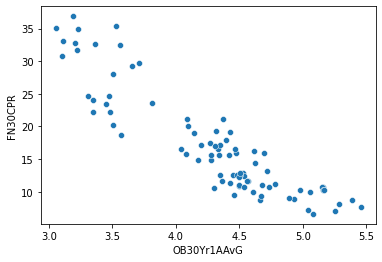

In [187]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr1AAvG", y="FN30CPR")

In [172]:
lmOB1A15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr1AAvG', MonthlyCPR15to21)
resultOB1A15to21 = lmOB1A15to21.fit()
resultOB1A15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     356.3
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.39e-31
Time:                        11:01:38   Log-Likelihood:                -223.17
No. Observations:                  84   AIC:                             450.3
Df Residuals:                      82   BIC:                             455.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      67.3707      2.690     25.045      0.000      62.019      72.722
OB30Yr1AAvG   -11.7474      0.622    -18.875      0.000     -12.986     -10.509
==============================================================================
Omnibus:                        1.950   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.846
Skew:                           0.272   Prob(JB):                        0.397
Kurtosis:                       2.519   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr1BAvG', ylabel='FN30CPR'>

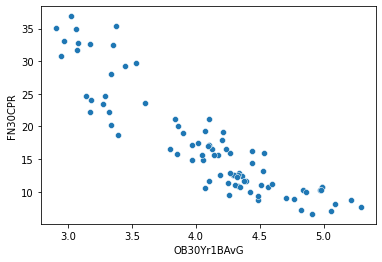

In [188]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr1BAvG", y="FN30CPR")

In [173]:
lmOB1B15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr1BAvG', MonthlyCPR15to21)
resultOB1B15to21 = lmOB1B15to21.fit()
resultOB1B15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     345.2
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           3.99e-31
Time:                        11:03:40   Log-Likelihood:                -224.25
No. Observations:                  84   AIC:                             452.5
Df Residuals:                      82   BIC:                             457.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      65.1649      2.615     24.917      0.000      59.962      70.367
OB30Yr1BAvG   -11.7604      0.633    -18.578      0.000     -13.020     -10.501
==============================================================================
Omnibus:                        2.026   Durbin-Watson:                   0.610
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                2.004
Skew:                           0.315   Prob(JB):                        0.367
Kurtosis:                       2.582   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr1CAvG', ylabel='FN30CPR'>

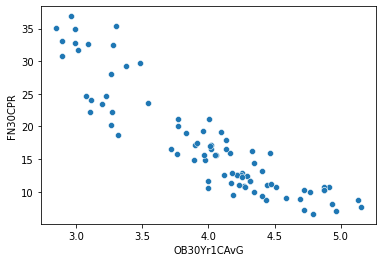

In [189]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr1CAvG", y="FN30CPR")

In [174]:
lmOB1C15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr1CAvG', MonthlyCPR15to21)
resultOB1C15to21 = lmOB1C15to21.fit()
resultOB1C15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     356.4
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.37e-31
Time:                        11:04:15   Log-Likelihood:                -223.16
No. Observations:                  84   AIC:                             450.3
Df Residuals:                      82   BIC:                             455.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      65.2683      2.579     25.306      0.000      60.137      70.399
OB30Yr1CAvG   -12.0303      0.637    -18.879      0.000     -13.298     -10.763
==============================================================================
Omnibus:                        1.864   Durbin-Watson:                   0.635
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.889
Skew:                           0.328   Prob(JB):                        0.389
Kurtosis:                       2.670   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr1DAvG', ylabel='FN30CPR'>

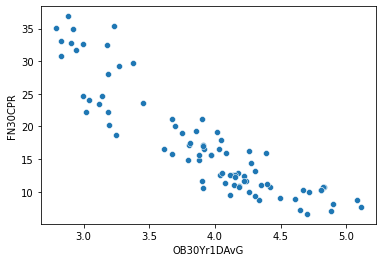

In [190]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr1DAvG", y="FN30CPR")

In [175]:
lmOB1D15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr1DAvG', MonthlyCPR15to21)
resultOB1D15to21 = lmOB1D15to21.fit()
resultOB1D15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     344.1
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           4.44e-31
Time:                        11:04:57   Log-Likelihood:                -224.36
No. Observations:                  84   AIC:                             452.7
Df Residuals:                      82   BIC:                             457.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      63.9269      2.553     25.036      0.000      58.847      69.006
OB30Yr1DAvG   -11.9414      0.644    -18.549      0.000     -13.222     -10.661
==============================================================================
Omnibus:                        2.316   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.307
Skew:                           0.360   Prob(JB):                        0.316
Kurtosis:                       2.624   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr1EAvG', ylabel='FN30CPR'>

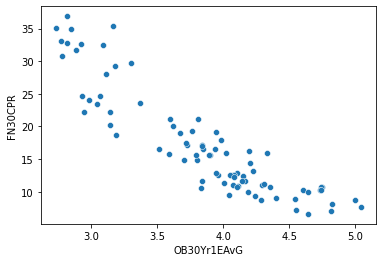

In [191]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr1EAvG", y="FN30CPR")

In [176]:
lmOB1E15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr1EAvG', MonthlyCPR15to21)
resultOB1E15to21 = lmOB1E15to21.fit()
resultOB1E15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     343.1
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           4.85e-31
Time:                        11:05:28   Log-Likelihood:                -224.45
No. Observations:                  84   AIC:                             452.9
Df Residuals:                      82   BIC:                             457.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      63.1351      2.515     25.108      0.000      58.133      68.137
OB30Yr1EAvG   -11.9616      0.646    -18.524      0.000     -13.246     -10.677
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.460
Skew:                           0.377   Prob(JB):                        0.292
Kurtosis:                       2.632   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr2AAvG', ylabel='FN30CPR'>

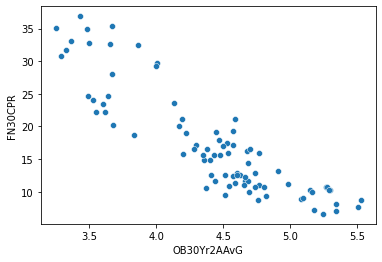

In [192]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr2AAvG", y="FN30CPR")

In [177]:
lmOB2A15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr2AAvG', MonthlyCPR15to21)
resultOB2A15to21 = lmOB2A15to21.fit()
resultOB2A15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     288.7
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.37e-28
Time:                        11:07:23   Log-Likelihood:                -230.21
No. Observations:                  84   AIC:                             464.4
Df Residuals:                      82   BIC:                             469.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      70.8477      3.190     22.210      0.000      64.502      77.194
OB30Yr2AAvG   -12.1416      0.715    -16.990      0.000     -13.563     -10.720
==============================================================================
Omnibus:                        3.039   Durbin-Watson:                   0.492
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.802
Skew:                           0.368   Prob(JB):                        0.246
Kurtosis:                       2.491   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr2BAvG', ylabel='FN30CPR'>

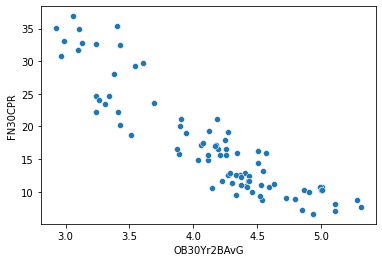

In [193]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr2BAvG", y="FN30CPR")

In [178]:
lmOB2B15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr2BAvG', MonthlyCPR15to21)
resultOB2B15to21 = lmOB2B15to21.fit()
resultOB2B15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     372.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           3.10e-32
Time:                        11:08:01   Log-Likelihood:                -221.64
No. Observations:                  84   AIC:                             447.3
Df Residuals:                      82   BIC:                             452.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.8190      2.602     25.676      0.000      61.642      71.996
OB30Yr2BAvG   -12.0061      0.622    -19.302      0.000     -13.244     -10.769
==============================================================================
Omnibus:                        2.573   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.481
Skew:                           0.356   Prob(JB):                        0.289
Kurtosis:                       2.551   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr2CAvG', ylabel='FN30CPR'>

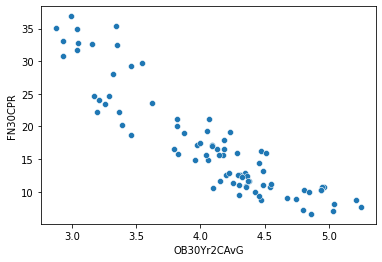

In [194]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr2CAvG", y="FN30CPR")

In [179]:
lmOB2C15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr2CAvG', MonthlyCPR15to21)
resultOB2C15to21 = lmOB2C15to21.fit()
resultOB2C15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     383.8
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.14e-32
Time:                        11:08:46   Log-Likelihood:                -220.62
No. Observations:                  84   AIC:                             445.2
Df Residuals:                      82   BIC:                             450.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.1153      2.529     26.146      0.000      61.085      71.146
OB30Yr2CAvG   -12.0142      0.613    -19.590      0.000     -13.234     -10.794
==============================================================================
Omnibus:                        2.818   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.712
Skew:                           0.378   Prob(JB):                        0.258
Kurtosis:                       2.549   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr2DAvG', ylabel='FN30CPR'>

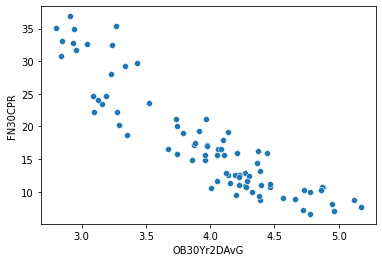

In [195]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr2DAvG", y="FN30CPR")

In [180]:
lmOB2D15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr2DAvG', MonthlyCPR15to21)
resultOB2D15to21 = lmOB2D15to21.fit()
resultOB2D15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     382.8
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.24e-32
Time:                        11:09:19   Log-Likelihood:                -220.71
No. Observations:                  84   AIC:                             445.4
Df Residuals:                      82   BIC:                             450.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      64.6668      2.459     26.300      0.000      59.775      69.558
OB30Yr2DAvG   -11.9239      0.609    -19.564      0.000     -13.136     -10.711
==============================================================================
Omnibus:                        2.482   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.451
Skew:                           0.368   Prob(JB):                        0.294
Kurtosis:                       2.602   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='OB30Yr2EAvG', ylabel='FN30CPR'>

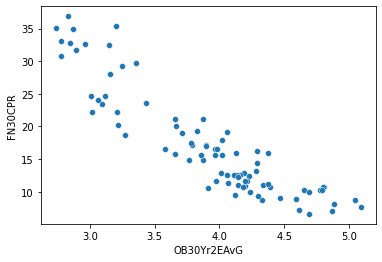

In [196]:
sns.scatterplot(data=MonthlyCPR15to21, x="OB30Yr2EAvG", y="FN30CPR")

In [181]:
lmOB2E15to21 = sm.OLS.from_formula('FN30CPR ~ OB30Yr2EAvG', MonthlyCPR15to21)
resultOB2E15to21 = lmOB2E15to21.fit()
resultOB2E15to21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FN30CPR   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     374.4
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           2.63e-32
Time:                        11:10:49   Log-Likelihood:                -221.48
No. Observations:                  84   AIC:                             447.0
Df Residuals:                      82   BIC:                             451.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      63.7735      2.441     26.131      0.000      58.919      68.628
OB30Yr2EAvG   -11.9405      0.617    -19.348      0.000     -13.168     -10.713
==============================================================================
Omnibus:                        2.596   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.575
Skew:                           0.385   Prob(JB):                        0.276
Kurtosis:                       2.623   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""